In [1]:
import evol_dynamics

In [2]:
import numpy as np

import copy
import axelrod as axl

In [3]:
C, D = axl.Action.C, axl.Action.D

In [4]:
import matplotlib.pyplot as plt

In [5]:
from collections import Counter

In [6]:
import itertools

In [7]:
import pandas as pd

In [8]:
columns = ["i",
           "number_of_repetitions",
           "y_1",
           "p_1",
           "q_1",
           "y_2",
           "p_2",
           "q_2",
           "delta"] + [f"v_{i}_theor" for i in range(1, 17)] + [f"v_{i}_simulated" for i in range(1, 17)]

In [9]:
len(columns)

41

In [10]:
df = pd.read_csv("data/soup_for_sixteen_states_stationary.csv", header=None)

In [11]:
df.columns = columns

In [12]:
df.head()

,i,number_of_repetitions,y_1,p_1,q_1,y_2,p_2,q_2,delta,v_1_theor,...,v_7_simulated,v_8_simulated,v_9_simulated,v_10_simulated,v_11_simulated,v_12_simulated,v_13_simulated,v_14_simulated,v_15_simulated,v_16_simulated
0,0,20000,0.417022,0.720324,0.000114,0.302333,0.146756,0.092339,0.999,0.000718,...,0.00900,0.05370,0.00600,0.05690,0.00200,0.02220,0.00000,0.00010,0.07835,0.7647
1,1,20000,0.186260,0.345561,0.396767,0.538817,0.419195,0.685220,0.999,0.031138,...,0.04075,0.05190,0.08505,0.04305,0.16280,0.07785,0.07080,0.03280,0.10440,0.0522
2,2,20000,0.204452,0.878117,0.027388,0.670468,0.417305,0.558690,0.999,0.081271,...,0.09085,0.13385,0.13230,0.10185,0.01915,0.01455,0.00410,0.00380,0.15150,0.1188
3,3,20000,0.140387,0.198101,0.800745,0.968262,0.313424,0.692323,0.999,0.015507,...,0.01560,0.03385,0.03320,0.01515,0.14045,0.06250,0.14055,0.06025,0.03305,0.0145
4,4,20000,0.876389,0.894607,0.085044,0.039055,0.169830,0.878143,0.999,0.039819,...,0.03760,0.18530,0.20015,0.02575,0.02425,0.00320,0.01845,0.00215,0.19030,0.0259


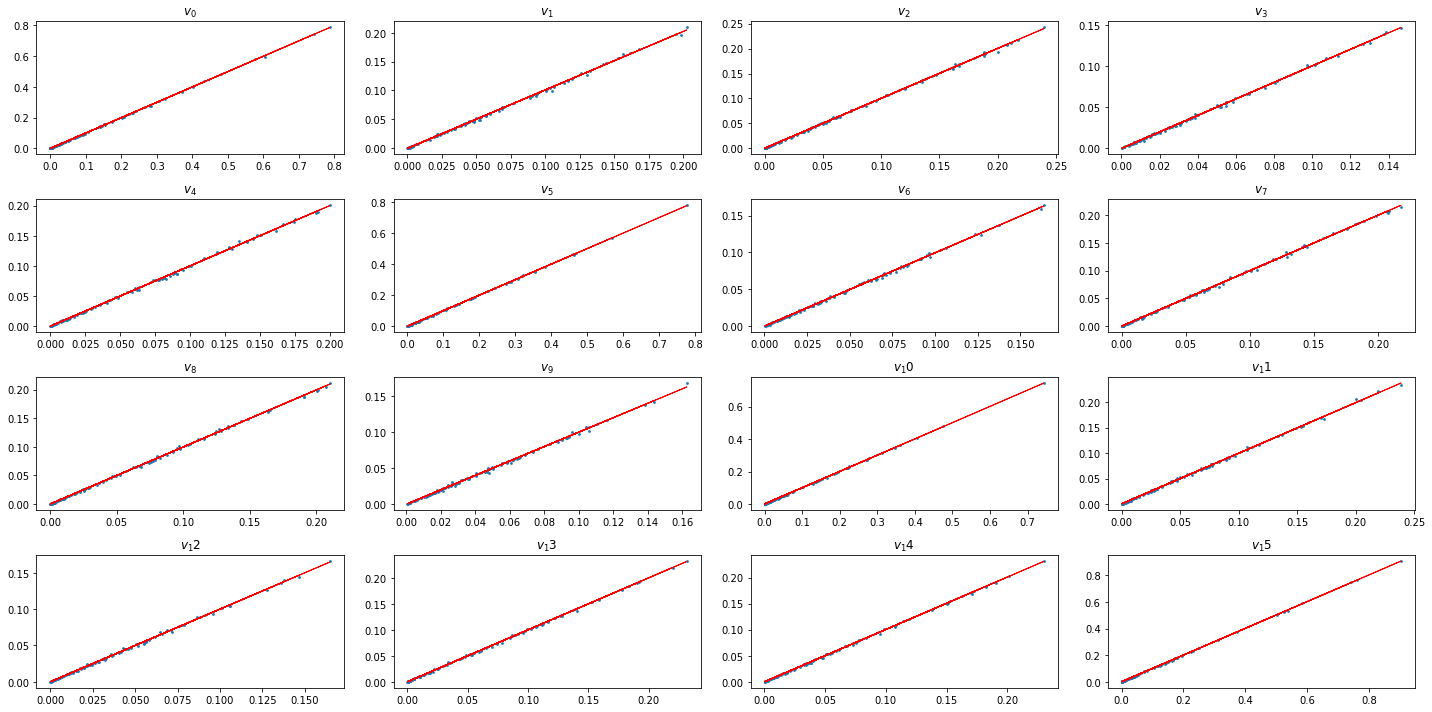

In [13]:
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(20, 10))


i = 0 
for x_c, y_c in zip(columns[9:25], columns[25:]):

    index = (int(i / 4), i % 4)
    
    x = df[x_c].values
    y = df[y_c].values
    
    m, b = np.polyfit(x, y, 1)
    axes[index].plot(x, m * x + b, color='red', linewidth=1,)
    
    axes[index].scatter(x, y, s=3)
    axes[index].title.set_text(f"$v_{i}$");
    

    i += 1
fig.tight_layout()

**TEST**

In [8]:
import numpy as np

import tqdm

In [15]:
number_of_checks = 2
delta = 0.999

seed = 0 # input
number_of_repetitions = 1 # input

num_of_opponents = 2

for i in tqdm.tqdm(range(number_of_checks)):
    
    random_state = np.random.RandomState(i)
    population_size = random_state.randint(50, 150)
    number_of_mutants = random_state.randint(10, 50)
    
    
#     simulated = evol_dynamics.get_probabilities_for_opponents(
#                                                             number_of_repetitions,
#                                                             population_size,
#                                                             number_of_mutants,
#                                                             random_state,
#                                                             num_of_opponents,
#                                                             )

    for _ in range(number_of_repetitions):
        pairs = evol_dynamics.match_pairs(
                population_size, number_of_mutants, random_state, num_of_opponents
            )
#         pairs = None
#         while pairs is None:
#             try:
#                 pairs = evol_dynamics.match_pairs(
#                         population_size, number_of_mutants, random_state, num_of_opponents
#                     )
#             except ValueError:
#                 pass

 50%|█████     | 1/2 [00:00<00:00, 209.38it/s]


ValueError: 'a' cannot be empty unless no samples are taken

In [35]:
population_size = 10
number_of_mutants = 2

import numpy as np

random_state = np.random.RandomState(0)

In [36]:
population = evol_dynamics.create_population(
    population_size, number_of_mutants, random_state
)

pairs = {i: [] for i in range(population_size)}

In [69]:
population_numbers = list(range(population_size))
random_state.shuffle(population_numbers)

In [70]:
population_numbers[:5], population_numbers[-5:]

([5, 2, 3, 4, 9], [0, 8, 7, 6, 1])

In [71]:
# while len(population_numbers) > 0:
#     player = population_numbers.pop()
#     opponent = random_state.choice(
#         [i for i in population_numbers if i not in pairs[player]]
#     )
#     population_numbers.remove(opponent)

#     pairs[player] += [opponent]
#     pairs[opponent] += [player]

In [93]:
player = population_numbers.pop()

In [94]:
player

0

In [95]:
[i for i in population_numbers if i not in pairs[player]]

[5, 4, 9]

In [96]:
opponent = random_state.choice(
        [i for i in population_numbers if i not in pairs[player]]
    )

In [97]:
population_numbers.remove(opponent)

In [98]:
pairs[player] += [opponent]
pairs[opponent] += [player]

In [99]:
pairs

{0: [3, 5],
 1: [5, 2],
 2: [7, 1],
 3: [0, 6],
 4: [9],
 5: [1, 0],
 6: [8, 3],
 7: [2, 8],
 8: [6, 7],
 9: [4]}

In [35]:


for _ in range(num_of_opponents):

    population_numbers = list(range(population_size))
    random_state.shuffle(population_numbers)

    while len(population_numbers) > 0:
        player = population_numbers.pop()
        opponent = random_state.choice(
            [i for i in population_numbers if i not in pairs[player]]
        )
        population_numbers.remove(opponent)

        pairs[player] += [opponent]
        pairs[opponent] += [player]

pairs_to_types = {
    population[i]: [population[j] for j in pairs[i]] for i in pairs.keys()
}